In [16]:
import cv2 as cv
import numpy as np
import os
names = []
TOTAL = 494
for i in range(TOTAL):
    names += [str(i+1) + '.jpeg']

import matplotlib.pyplot as plt 

In [17]:
def normalize(plane):
    imin = np.percentile(plane,1)
    imax = np.percentile(plane,99)
    return np.clip((plane - imin) / (imax - imin),0,1)

def whiteBalance(img):
    img = np.array(img).astype(np.float32)
    b,g,r = cv.split(img)
    b_mean, g_mean, r_mean = b.mean(),g.mean(),r.mean()
    k = (b_mean + g_mean + r_mean) / 3.0
    b *= k / (b_mean + 1e-7)
    g *= k / (g_mean + 1e-7)
    r *= k / (r_mean + 1e-7)
    pic = cv.merge([b,g,r])
    return pic

def sharpen(img):
    kernel = np.array([[0,0,0],[0,1,0],[0,0,0]])
    return cv.filter2D(img,-1,kernel)

def blurring(img):
    gaussian = cv.GaussianBlur(src=img,ksize=(5,5),sigmaX=0,sigmaY=0)
    return gaussian


In [3]:
    
def cvt2pos(img,i,gamma=1.0):
    img = cv.imread(img)
    new_img = cv.fastNlMeansDenoisingColored(img,None,10,10,7,15) #h,hcolor,tempalteWindowSize,searchWIndowSize
    bneg,gneg,rneg = cv.split(img)
    b,g,r = 1-normalize(bneg), 1-normalize(gneg), 1-normalize(rneg)
    normalized_image = (cv.merge([b,g,r]) * 255).astype(np.uint8)

    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255 for i in np.arange(0, 256)]).astype("uint8")
    new_img = cv.LUT(normalized_image, table)
    
    #plt.imshow(new_img)
    #plt.show()
    new_img = whiteBalance(new_img)
    new_img = sharpen(new_img)
    new_img = blurring(new_img)
    #new_img = denoising(new_img)
    
    
    cv.imwrite("positive_image" + str(i+1) + ".jpeg",new_img)

In [22]:
for a,b in enumerate(names):
    cvt2pos(b,a)
    if (a+1) % 50 == 0:
        print(f'finish: {a+1-50} - {a+1}')

print(f'FINISH! ALL {TOTAL} pictures')

finish: 0 - 50
finish: 50 - 100
finish: 100 - 150
finish: 150 - 200
finish: 200 - 250
finish: 250 - 300
finish: 300 - 350
finish: 350 - 400
finish: 400 - 450
FINISH! ALL 494 pictures


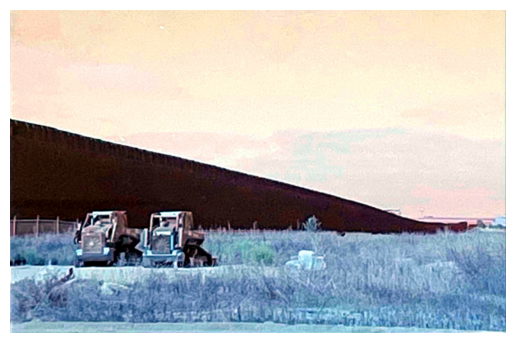

In [23]:
image = cv.imread('positive_image482.jpeg')
plt.imshow(image)
plt.axis('off')
plt.show()